In [13]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import cv2
import os
from tensorflow.keras.models import load_model
from config import *

In [14]:
class PredictWithModel:
    shape = (224, 224, 1)
    test_folder_path = 'data/test'
    
    def __init__(self, version: str) -> None:
        self.model_version = version
        self.model = load_model(f'models/model_v{version}.h5')
        
        self.path = os.listdir(self.test_folder_path)
        self.images = np.empty((_s:=len(self.path), ) + self.shape, dtype='float16')
        
        self.predictions = pd.DataFrame(columns=['ID', 'Target'])
    
    def parse_img(self, img_path: str) -> np.array:
        image = ~cv2.imread(f"{self.test_folder_path}/{img_path}", 0)/255
        return np.asarray(image, dtype='float16').reshape(self.shape)
    
    def img_predict(self):
        print(f'Model version: {self.model_version}\n'
              f'Start predicting...')
        for i, img_path in enumerate(self.path):
            self.images[i] = self.parse_img(img_path)
            
        for i, p in enumerate(self.model.predict(self.images)):
            self.predictions.loc[i] = [self.path[i], CATEGORIES_REVERSE[np.argmax(p)]]
        print("[+] Done")
            
    def save(self):
        self.predictions.to_csv(f'data/result/predictions_{self.model_version}.csv', index=False)

    def img_predict_show(self, index: int) -> None:
        plt.title(f"Prediction: {self.predictions['Target'][index]}")
        plt.imshow(self.images[index], cmap='gray')

Model version: 0.4
Start predicting...
161/161 [==============================] - 25s 157ms/step
[+] Done


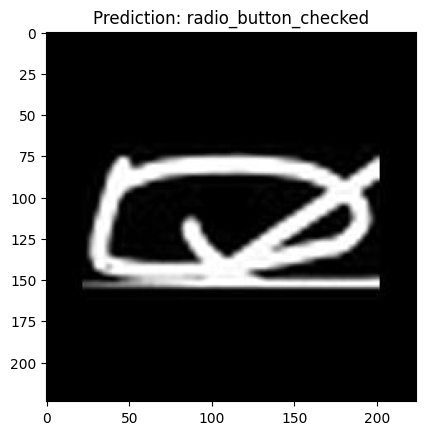

In [15]:
#Use the last version
model_version = '0.4' #os.listdir('models')[-1][7:-3]
predictions = PredictWithModel(model_version)
predictions.img_predict()
predictions.img_predict_show(300)

In [16]:
predictions.save()